# Listing 1-1

In [4]:
# Mengimport Library
%matplotlib inline
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

# Listing 1-2

In [5]:
# Membaca data yang ada di memori
data = pd.read_csv('G:/Other computers/My Laptop/Semester 2/Big Data Analysis/Case Study 1/trip.csv')

# Listing 1-3

In [6]:
# Mencetak ukuran dataset & mencetak beberapa baris pertama
print(len(data))
data.head() 

236065


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


# Listing 1-15

In [7]:
# Determining the Measures of Center Using Statistics Package
# Menentukan Ukuran dari Pusat Menggunakan Statistics Package
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print ('Mean of trip duration: %f' %statistics.mean(trip_duration))
print ('Median of trip duration: %f' %statistics.median(trip_duration))
print ('Mode of station originating from: %s' %statistics.mode(station_from))

Mean of trip duration: 1202.612210
Median of trip duration: 633.235000
Mode of station originating from: Pier 69 / Alaskan Way & Clay St


# Listing 1-16

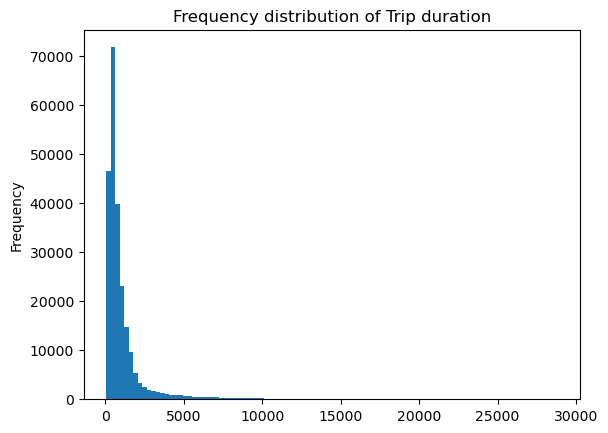

In [8]:
# Plotting Histogram of Trip Duration
# Melakukan Plot Histigram untuk Trip Duration
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

# Listing 1-17

In [9]:
# Interval of Values Not Considered Outliers
# Interval Nilai yang Tidak Dianggap Outlier
# [Q1 - 1.5 (IQR) , Q3 + 1.5 (IQR) ] (i.e. IQR == Q3 - Q1)

# Listing 1-18

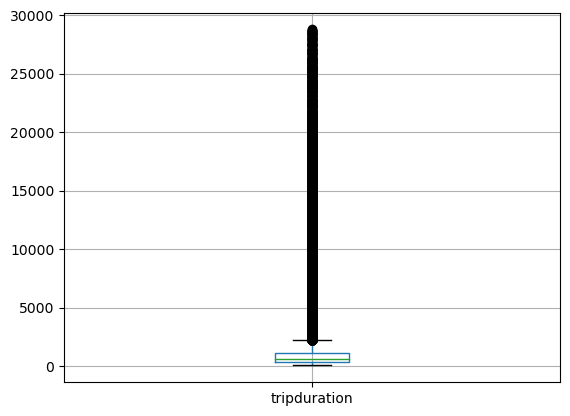

In [10]:
# Plotting a Box plot of Trip Duration
# plotting Box plot dari Trip Duration
box = data.boxplot(column=['tripduration'])
plt.show()

# Listing 1-19

In [11]:
# Determining Ratio of Values in Observations of tripduration Which Are Outliers
# menetukan rasio nilai dalam observasi dari trip duration yang Outlier
#[Q1 – 1.5 (IQR) , Q3 + 1.5 (IQR) ] (i.e. IQR = Q3 - Q1)

q75, q25 = np.percentile(trip_duration, [75 ,25]) 
iqr = q75 - q25
print ('Proportion of values as outlier: %f percent'%((len(data) - len([x for x in trip_duration if q75+(1.5*iqr)
    >=x>= q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of values as outlier: 9.548218 percent


# Listing 1-20

In [12]:
#Number of outliers values = Length of all values - Length of all non outliers values 
Number_of_outliers_values = len(data) - len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
Number_of_outliers_values

22540

# Listing 1-21

In [13]:
Ratio_of_outliers = ( Number_of_outliers_values / len(data) ) * 100
Ratio_of_outliers

9.548217651917904

# Listing 1-22

In [14]:
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print ('Mean of trip duration: %f'%mean_trip_duration)

Mean of trip duration: 711.726573


# Listing 1-23

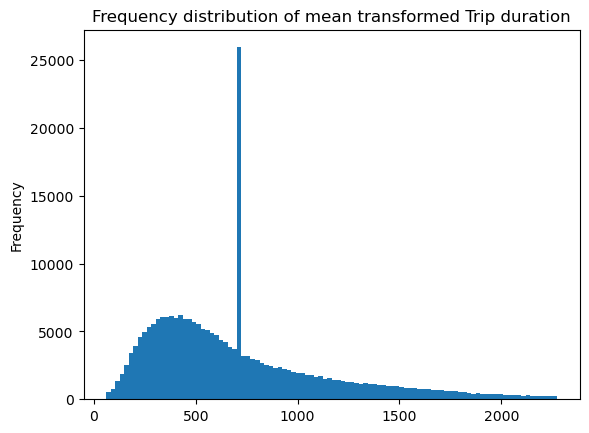

In [15]:
def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x
data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))
data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

# Listing 1-24

In [16]:
print ('Mean of trip duration: %f'%data['tripduration_mean'].mean())
print ('Standard deviation of trip duration: %f'%data['tripduration_mean'].std())
print ('Median of trip duration: %f'%data['tripduration_mean'].median())

Mean of trip duration: 711.726573
Standard deviation of trip duration: 435.517297
Median of trip duration: 633.235000
